In [4]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import cv2



In [5]:
def plot_gallery(images,titles,h,w,n_row=3,n_col=4):
    '''helper function to plot a gallery of portraits'''
    plt.figure(figsize=(1.8*n_col,2.4*n_row))
    plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row * n_col,i+1)
        plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
        plt.title(titles[i],size=12)
        plt.xticks(())
        plt.yticks(())

In [6]:


import zipfile


zip_file_path = r"C:\Users\SK Bissau.LDA\Downloads\dataset.zip"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\SK Bissau.LDA\Downloads\extracted_dataset")





In [7]:
dir_name = r"C:\Users\SK Bissau.LDA\Downloads\extracted_dataset\dataset\faces"

y=[];x=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    if os.path.exists(dir_path) and os.path.isdir(dir_path):
        class_names.append(person_name)
        for image_name in os.listdir(dir_path):
            image_path = os.path.join(dir_path, image_name)
            if image_path.endswith('.jpg') or image_path.endswith('.png'):  # Check if the file is an image
                img= cv2.imread(image_path)
                gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                resized_image= cv2.resize(gray,(h,w))
                v=resized_image.flatten()
                x.append(v)
                n_samples=n_samples+1
                y.append(person_id)
                target_names.append(person_name)
        person_id=person_id+1

y=np.array(y)
x=np.array(x)
target_names=np.array(target_names)
n_features=x.shape[1]
print(y.shape,x.shape,target_names.shape)
print("No of samples: ",n_samples)
#lfw people =fetch_lfw_people(min_faces_per_person=70, resize=0.4)

##introspect the images arrays to find the shapes (for plotting) 
#n_samples, h, w =lfw_people.images.shape

#print(n_samples, h, w)

#for machine Learning we use the 2 data directly (as relative pixel

##positions info is ignored by this model)

#x=lfw_people.data

#n_features= x.shape[1]

#print (x.shape)

#the Label to predict is the id of the person

#print(y)

#y=lfw_people.target

#if 0 in y:
#    print("yes")

#target_names= lfw_people.target_names

#print (target_names)
n_classes=target_names.shape[0]
print("Total dataset size : ")
print("n_samples:%d" % n_samples)
print("n_features:%d" % n_features)
print("n_classes:%d" % n_classes)

(443,) (443, 90000) (443,)
No of samples:  443
Total dataset size : 
n_samples:443
n_features:90000
n_classes:443


Extracting the top 150 elgenfaces from 332 faces


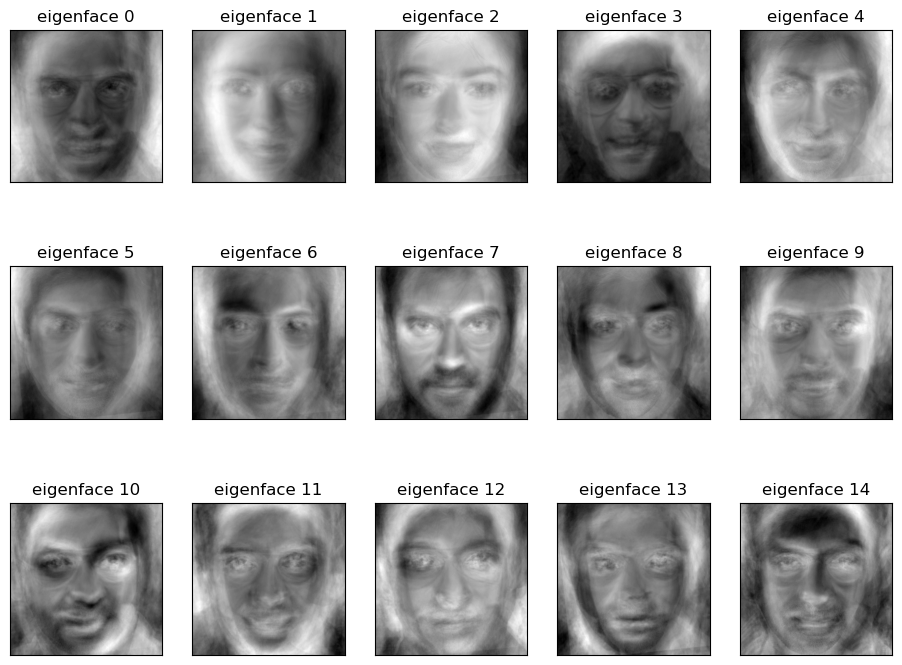

Projecting the input data on  the eigenfaces orthonormal basis
[[ 1.4996876   0.01837213  0.3011913  ... -0.03783699 -0.50651841
   0.15981351]
 [-0.40212189  1.12434298  0.63135686 ...  0.91646258 -1.21277376
   1.29400225]
 [ 1.09628914 -2.69265042 -0.65896413 ... -1.25508385  0.09198948
  -0.3359791 ]
 ...
 [ 0.64658837  0.09287995  0.34120107 ... -0.78992582 -0.23884807
   0.23526912]
 [-0.4047924   1.75921212 -0.49404723 ...  1.10833864  0.04126605
  -0.80582534]
 [ 0.11943239 -0.75814908 -0.02891531 ...  0.96538274 -1.70165147
   0.71968289]] [[-1.17781516 -0.79123926 -0.36975871 ... -0.27333751  0.66311238
   0.84106904]
 [ 2.12266234 -1.9069064  -0.58849671 ...  0.21582697 -0.09964593
   0.0884624 ]
 [ 0.83564844  0.55948856  0.49775919 ...  0.99109203  0.69363934
   0.48189666]
 ...
 [ 0.44593186 -1.21813864  0.01468313 ... -0.58826981  0.41046567
  -0.01733487]
 [-0.69158997  1.90191527 -0.41996228 ...  0.51752032  0.07713729
  -0.1595666 ]
 [-0.50582159  1.08112988  0.094855

In [24]:
################################################################################
#split into a training set and a test set using a stratified k fold

#split into a tratning and testing set
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.25, random_state=42)
#Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled #dataset): 
# unsupervised feature extraction/dimensionality reduction 
n_components= 150
print("Extracting the top %d elgenfaces from %d faces"% (n_components, x_train.shape[0]))
#Applying PCA
pca= PCA(n_components=n_components, svd_solver = 'randomized', whiten =True).fit(x_train)
#Generating eigenfaces
h, w = 300, 300  # Use the actual image dimensions
eigenfaces = pca.components_.reshape((n_components, h, w))
#plot the gallery of the most significant eigenfaces
eigenface_titles=["eigenface %d" % i for i in range(eigenfaces.shape[0])]

def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
plot_gallery(eigenfaces,eigenface_titles,h,w)
plt.show()

print("Projecting the input data on  the eigenfaces orthonormal basis")
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_train_pca,x_test_pca)

#%%compute fisherfaces
lda=LinearDiscriminantAnalysis()
#Compute lda of reduced data
lda.fit(x_train_pca,y_train)

x_train_lda=lda.transform(x_train_pca)
x_test_lda=lda.transform(x_test_pca)
print("Project done....")



In [26]:
#Training with multilayer perceptron

clf=MLPClassifier(random_state=1,hidden_layer_sizes =(10,10),max_iter=1000,verbose=True).fit(x_train_lda,y_train)
print("Model weights: ")
model_info=[coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.89787319
Iteration 2, loss = 2.84535028
Iteration 3, loss = 2.79369303
Iteration 4, loss = 2.74541667
Iteration 5, loss = 2.69886649
Iteration 6, loss = 2.65262076
Iteration 7, loss = 2.61011238
Iteration 8, loss = 2.56953986
Iteration 9, loss = 2.52834702
Iteration 10, loss = 2.49121371
Iteration 11, loss = 2.45254013
Iteration 12, loss = 2.41634191
Iteration 13, loss = 2.38220503
Iteration 14, loss = 2.34818614
Iteration 15, loss = 2.31587573
Iteration 16, loss = 2.28329753
Iteration 17, loss = 2.25368455
Iteration 18, loss = 2.22410891
Iteration 19, loss = 2.19523436
Iteration 20, loss = 2.16717750
Iteration 21, loss = 2.13972017
Iteration 22, loss = 2.11271043
Iteration 23, loss = 2.08668321
Iteration 24, loss = 2.06210883
Iteration 25, loss = 2.03728875
Iteration 26, loss = 2.01315284
Iteration 27, loss = 1.99013145
Iteration 28, loss = 1.96702646
Iteration 29, loss = 1.94501282
Iteration 30, loss = 1.92330560
Iteration 31, loss = 1.90259705
Iteration 32, los

Accuracy:  9.90990990990991


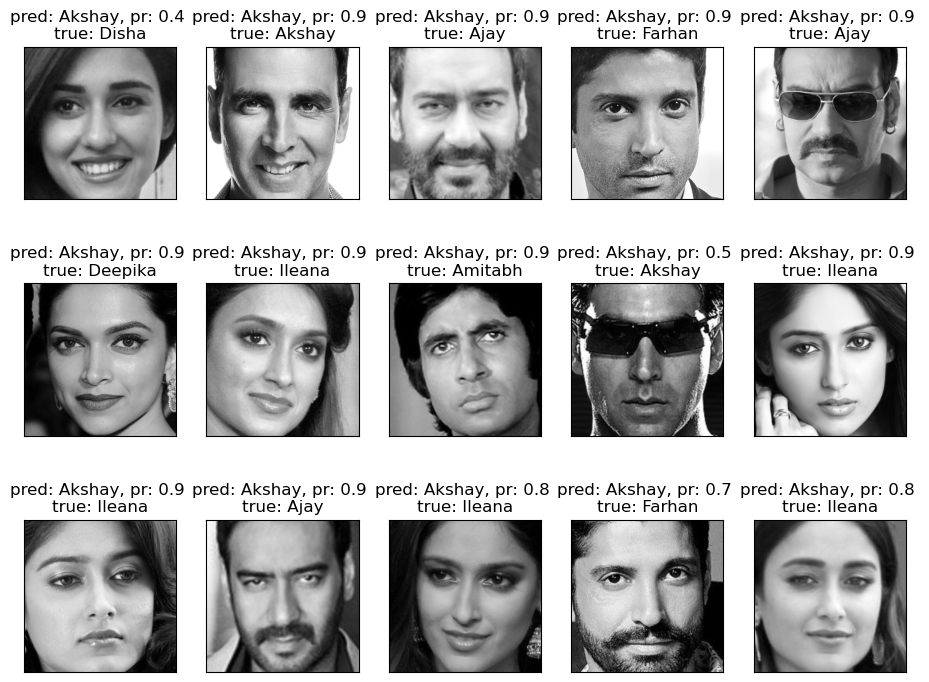

In [40]:
y_pred=[];y_prob=[]

for test_face in x_test_lda:
    prob = clf.predict_proba([test_face])[0]
    #print(prob, np.max(prob))
    class_id = np.where(prob == np.max(prob))[0][0]
    #print(class_index)
    # Find the Label of the mathed face
    y_pred.append(class_id)
    y_prob.append(np.max(prob))
    
#Transform the data
y_pred=np.array(y_pred)


prediction_titles=[]
true_positive =0
for i in range(y_pred.shape[0]):
    #print(y_test[i],y_pred[i])
    #true name target names[y_test[i]].rsplit(' ',1)[-1]
    #pred name= target names[y_pred[1]].rsplit(' ',1)[-1]
    true_name = class_names[y_test[i] ]
    pred_name=class_names[y_pred[1]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    #result ='prediction : %s intrue:  %s' %(pred_name, true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive=true_positive+1

print('Accuracy: ',true_positive*100/y_pred.shape[0])

#plot results
plot_gallery(x_test,prediction_titles,h,w)
plt.show()